# Project 1

In [24]:
#import section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import timeit

In [25]:
# Linear regression using gradient descent
# y:          vector of outputs (dimension N)
# tx:         matrix of data (dimension N x D), such that tx[:, 0] = 1
# initial_w:  vector (dimension D)
# max_iters:  scalar
# gamma:      scalar respresenting step size
# return parameters w for the regression and loss

def least_squares_GD(y, tx, initial_w,max_iters, gamma):
    N, D = tx.shape
    
    # Iterations of gradient descent
    w = initial_w
    for _ in range(max_iters):
        grad = -np.dot(tx.T, (y - np.dot(tx,w))) / N
        w = w - gamma * grad
        
    # Calculating the loss
    r = y - np.dot(tx,w)
    loss = np.dot(r,r) / (2*N)
    
    return w, loss

In [26]:
#Linear regression using stochastic gradient descent
def least_squares_SGD(y, tx, initial_w,max_iters, gamma, frequency=0):
    N, D = tx.shape
    
    # Iterations of stochastic gradient descent
    w = initial_w
    for i in range(max_iters):
        k = random.randint(0,N-1)
        grad = -(y[k]-np.dot(tx[k,:], w))*tx[k,:]
        w = w - gamma * grad
        # Calculating the loss
        if frequency != 0 and i % frequency == 0:
            r = y - np.dot(tx,w)
            loss.append(np.dot(r,r) / (2*N))
            
    r = y - np.dot(tx,w)
    loss = np.dot(r,r) / (2*N)    
    
    return w, loss


In [27]:
#Least squares regression using normal equations
def least_squares(y, tx):
    N, _ = tx
    
    # Calculating w
    w = (np.linalg.inv((tx.T).dot(tx)).dot(tx.T)).dot(y)
    
    #Calculating loss
    r = y - tx.dot(w_opt)
    loss = np.dot(r,r)/(2*N)
    return w_opt, loss

In [28]:
#Ridge regression using normal equations
# y:          vector of outputs (dimension N)
# tx:         matrix of data (dimension N x D)
#lambda_:     regularization parameter

def ridge_regression(y, tx, lambda_):
    N,D = tx.shape
    
    A = np.dot(tx.T, tx) + lambda_ * np.ones(D)
    B = np.linalg.inv(A)
    w = np.dot(np.dot(B,tx.T), y)
    
    # Calculating loss
    r = y - np.dot(tx,w)
    loss = (np.dot(r,r)+ lambda_ * np.dot(w,w)) / (2*N)
    
    return w, loss
    
    

In [29]:
# Returns 1/(1+exp(-x))
# x is scalar or numpy array
def sigmoid(x):
    tmp = np.exp(-x)
    return 1/(1+tmp)



#Logistic regression using SGD
# y:          vector of outputs (dimension N)
# tx:         matrix of data (dimension N x D), such that tx[:, 0] = 1
# initial_w:  vector (dimension D)
# max_iters:  scalar
# gamma:      scalar respresenting step size
# return parameters w for the regression and loss
def logistic_regression(y, tx, initial_w,max_iters, gamma):
    N, _ = tx.shape
    w = initial_w
    
    for _ in range(max_iter):
        k = random.randint(0,N-1)
        tmp = np.dot(tx[k,:],w)
        grad = -y[k]*tx[k,:]+sigmoid(tmp)*tx[k,:]
        w = w - gamma*grad
    
    tmp = np.dot(tx,w)
    loss = - np.dot(y,tmp)+np.sum(np.log(1+np.exp(tmp)))
    return (w, loss)


def logistic_regression_GD(y, tx, initial_w,max_iters, gamma):
    w = initial_w
    
    for _ in range(max_iter):
        tmp = np.dot(tx, w)
        grad = np.dot((sigmoid(tmp) - y), tx)
        w = w - gamma*grad
    
    tmp = np.dot(tx,w)
    loss = - np.dot(y,tmp)+np.sum(np.log(1+np.exp(tmp)))
    return (w, loss)

In [30]:
#Regularized logistic regression using SGD
# y:          vector of outputs (dimension N)
# tx:         matrix of data (dimension N x D), such that tx[:, 0] = 1
# lambda:     scalar representing regularization parameter
# initial_w:  vector (dimension D)
# max_iters:  scalar
# gamma:      scalar respresenting step size
# return parameters w for the regression and loss

def reg_logistic_regression(y, tx, lambda_ ,initial_w, max_iters, gamma, frequency=0, x_test=None, y_test=None, log=None):
    N, _ = tx.shape
    w = initial_w
    
    
    
    for i in range(max_iters):
        k = random.randint(0,N-1)
        tmp = np.sum(tx[k,:]*w)
        grad = -y[k]*tx[k,:]+sigmoid(tmp)*tx[k,:]+lambda_*w
        w = w - gamma*grad
        
        if frequency != 0 and i % frequency == 0:
            tmp = np.dot(tx,w)
            loss = (- np.dot(y,tmp)+np.sum(np.log(1+np.exp(tmp))))/N
            if loss == float('inf') or loss == float('nan'):
                print("Overflow")
                return w, losses
            losses.append(loss)
            train_evaluation = evaluate_on_set(w,tx,y)
            print(f'iteration {i}: loss: {losses[-1]}, precision on train: {train_evaluation}')
            if x_test is not None and y_test is not None:
                test_evaluation = evaluate_on_set(w,x_test,y_test)
                print(f'precision on test: {test_evaluation}\n')
            if log != None:
                row = {'lambda':[lambda_], 'gamma': [gamma], 'iteration': [i], 'loss': [loss]}
                row.update({'acc_train': [train_evaluation['accuracy']], 'prec_train': [train_evaluation['precision']], 
                       'recall_train': [train_evaluation['recall']], 'f1_train': [train_evaluation['f1_score']] })
                
                row.update({'acc_test': [test_evaluation['accuracy']], 'prec_test': [test_evaluation['precision']], 
                       'recall_test': [test_evaluation['recall']], 'f1_test': [test_evaluation['f1_score']] })
                for j in range(len(w)):
                    row[f'w_{j}'] = [w[j]]      
                info = pd.concat([info, pd.DataFrame.from_dict(row)])
                    
    ### 
    tmp = np.dot(tx,w)
    loss = (- np.dot(y,tmp)+np.sum(np.log(1+np.exp(tmp))))/N
    #losses.append(loss)
    
    if log != None:
        info.to_csv(log)
    
    return w, loss

def reg_logistic_regression_GD(y, tx, lambda_ ,initial_w, max_iters, gamma):
    w = initial_w
    
    for _ in range(max_iters):
        tmp = np.dot(tx, w)
        grad = np.dot((sigmoid(tmp) - y), tx) + lambda_*w
        w = w - gamma*grad
    
    ### 
    tmp = np.dot(tx,w)
    loss = - np.dot(y,tmp)+np.sum(np.log(1+np.exp(tmp)))
    return w, loss

# Loading data

In [31]:
def load_data():
    path_train = './data/train.csv.zip'
    path_test = './data/test.csv.zip'

    train_data = pd.read_csv(path_train, compression='zip')
    test_data = pd.read_csv(path_test, compression='zip')
    return train_data, test_data



# Transform categorical data

In [32]:
def transform_categorical_data(train_data, test_data):
    ccolumn = 'PRI_jet_num'

    for i in range(4):
        train_data[ccolumn+str(i)] = (train_data[ccolumn] == i).apply(lambda x: int(x))
        test_data[ccolumn+str(i)] = (test_data[ccolumn] == i).apply(lambda x: int(x))
     
    test_data.drop([ccolumn], axis=1, inplace=True)
    train_data.drop([ccolumn], axis=1, inplace=True)
    
    return train_data, test_data

# Cleaning data

In [33]:
def fill_nans_with_median(train_data):
    columns_with_nan = []
    for column in train_data.columns:
        if train_data[column].min() == -999:
            columns_with_nan.append(column)
    
    for column in columns_with_nan:
        tmp = train_data[train_data[column] != -999][column].describe()['50%']
        train_data.loc[train_data[column] == -999, [column]] = tmp

    return train_data


## KNN for filling nan data - Johann

In [34]:
train_data2 = train_data1.copy()
completely_valid_data = train_data2[(train_data2.min(axis=1) != -999)]
completely_valid_data.shape

NameError: name 'train_data1' is not defined

In [35]:
completely_valid_data= completely_valid_data.drop(['Id', 'Prediction'], axis=1)

pc = completely_valid_data.corr(method='pearson', min_periods=1)

NameError: name 'completely_valid_data' is not defined

In [ ]:
pc = pc[columns_with_nan]

In [36]:
closest_columns = {}
for column in columns_with_nan:
    pc[f'{column}-abs'] = abs(pc[column])
    tmp = pc.sort_values(f'{column}-abs', ascending=False).head(2)
    print(column)
    print(tmp.index)
    print(tmp[f'{column}-abs'].values)
    closest_columns[column] = tmp.index.values
    print("------------------------------------------------------")

NameError: name 'columns_with_nan' is not defined

In [ ]:
train_data2 = train_data1.copy().drop(['Prediction'], axis=1)

for column in columns_with_nan:
    train_data2.loc[train_data2[column]==-999,column] = np.nan
    
k = 100
#imputer = imp.KNNImputer(n_neighbors=k)
n1=0
n2=0
for column in columns_with_nan:
    columns = closest_columns[column]
    train_data2 = train_data2.sort_values(columns[1])
    train_data2.reset_index(inplace=True)
    train_data2.drop('index', axis=1, inplace=True)
    #tmp = train_data2[columns]

    for i in range(k):
        c = int(train_data2.shape[0]/k)
        print(i*c,(i+1)*c)
        curr_slice = train_data2.loc[i*c:((i+1)*c-1), column]
        print(curr_slice.shape)
        if curr_slice.count() ==c:
            print("next")
            continue
        if curr_slice.count()==0:
            print("PROBLEM")            
            curr_slice[curr_slice.isna()] = train_data2.loc[:((i+1)*c-1),column].mean()
        else:
            curr_slice[curr_slice.isna()] = curr_slice.mean()
            n2 += 1
    

In [37]:
n1, n2

NameError: name 'n1' is not defined

In [ ]:
train_data_backup=train_data2.copy()

In [38]:
for column in train_data_backup.columns:
    train_data_backup[column].hist(bins=100)
    plt.show()

NameError: name 'train_data_backup' is not defined

# Standardizing data

In [39]:
def standardize(df):
    for column in df.columns:
        if column == 'Prediction' or column =='Id':
            continue
        df[column] = (df[column]-df[column].min())/(df[column].max()-df[column].min())
    return df

# Augmentation functions

In [40]:
def feature_exp_expansion(train_data, columns):
    for column in columns:
        if column in ['PRI_jet_num0', 'PRI_jet_num1', 'PRI_jet_num2', 'PRI_jet_num3', 'Prediction']:
            continue
       
        train_data[f'exp_{column}'] = np.exp(train_data[column])
    return train_data
            

def feature_log_expansion(train_data, columns):
    for column in columns:
        if train_data[column].min() > 0:
            train_data[f'log_{column}'] = np.log(train_data[column])
    return train_data

In [41]:
def feature_polynomial_expansion(x, columns, d):
    if d == 1:
        return x
    
    if d == 0:
        new_x = x.drop(columns, axis=1)
        return new_x
    
    new_x = x.copy()
    for column in columns:
        if column in ['PRI_jet_num0', 'PRI_jet_num1', 'PRI_jet_num2', 'PRI_jet_num3']:
            continue
        for i in range(2,d+1):
            new_x[f'{column}^{i}'] = x[column] ** i
            
    return new_x

In [42]:
def add_constant_attribute(x):
    N, _ = x.shape
    new_x = x.copy()
    new_x['Constant'] = 1
    return new_x

# Splitting function

In [43]:
def split (data, ycolumn, train_ratio=0.50, seed=42):
    np.random.seed(seed)
    
    # default extreme value for train_ratio
    if train_ratio > 0.90:
        train_ratio = 0.90
    train_size = round(train_ratio * len(data))
    
    boson = data[data[ycolumn]==1].to_numpy()
    spiner = data[data[ycolumn]==0].to_numpy()
    np.random.shuffle(boson)
    np.random.shuffle(spiner)
    train = np.concatenate((boson[:round(train_size/2)], spiner[:round(train_size/2)]))
    test = np.concatenate((boson[round(train_size/2):], spiner[round(train_size/2):]))
    
    columns = data.columns
    return pd.DataFrame(train, columns=columns), pd.DataFrame(test, columns=columns)

# Predicting functions

In [44]:
def predict(x, w):
    p = sigmoid(np.dot(x,w))
    return np.array([int(i>0.5) for i in p])

def get_accuracy(y,y_predict):
    return 1 - np.sum(abs(y-y_predict))/ len(y)     

def get_recall(y,y_predict):
    return np.count_nonzero(np.logical_and(y,y_predict)) / np.count_nonzero(y)

def get_precision(y,y_predict):
    if np.count_nonzero(y_predict) == 0:
        return 0
    return np.count_nonzero(np.logical_and(y,y_predict)) / np.count_nonzero(y_predict)

def evaluate_on_set(w, x, y):
    y_predict = predict(x, w)
    accuracy = get_accuracy(y,y_predict)
    recall = get_recall(y,y_predict)
    precision = get_precision(y,y_predict)
    if recall+precision == 0:
        return 0
    f1_score = 2*recall*precision/(recall+precision)
    return {'accuracy' : accuracy, 'recall': recall, 'precision':precision, 'f1_score':f1_score}


In [45]:
y = np.array([0,1,23])
x = np.array([1,0,2])
r = np.logical_and(x, y)
np.count_nonzero(r)

1

# Transform data

In [46]:
def split_train_test(data, ratio=0.5, seed=42):
    train_df, test_df = split(data, 'Prediction', ratio, seed)
    x_train = train_df.drop(['Prediction'], axis=1)
    y_train = train_df['Prediction']
    x_test = test_df.drop(['Prediction'], axis=1)
    y_test = test_df['Prediction']
    return x_train.values, y_train.values, x_test.values, y_test.values

# Experiment 1

In [47]:
y = train_data['Prediction']
print(np.count_nonzero(y))
print(np.count_nonzero(y==0))

NameError: name 'train_data' is not defined

In [48]:

columns = train_data.columns[2:]
curr_data = feature_polynomial_expansion(train_data, columns, 2)
curr_data = add_constant_attribute(curr_data)

x_train, y_train, x_test, y_test = split_train_test(curr_data)

print(np.unique(y_train))
print(np.unique(y_test))

lambda_ = 0.0001
gamma = 0.00001
max_iters = 10000000
initial_w = x_train.mean(axis=0)

w, loss, df = reg_logistic_regression(y_train, x_train, lambda_, initial_w, max_iters, gamma, 0, x_test=x_test, y_test=y_test, log=f'Test.csv')

    
print(f'lambda = {lambda_}; gamma = {gamma}')
print(f'TRAIN precision: {evaluate_on_set(w,x_train, y_train)}')
print(f'TEST precision: {evaluate_on_set(w,x_test, y_test)}')

df.head()


NameError: name 'train_data' is not defined

In [ ]:
test_data = feature_polynomial_expansion(test_data, columns, 2)
test_data = add_constant_attribute(test_data)
x = test_data.drop(['Id', 'Prediction'], axis=1)
y_predict = pd.DataFrame(predict(x, w), columns=['Prediction'])

submission = pd.read_csv('./data/sample-submission.csv')
print(submission.columns)
submission.drop(['Prediction'], axis=1, inplace=True)

new = pd.merge(submission, y_predict, left_index=True, right_index=True)
submission.to_csv("SubmissionTest.csv")

# First bigger experiment

In [49]:
df.describe()

NameError: name 'df' is not defined

In [50]:
def_lambda_ = 0.0001
def_gamma = 0.0001
def_d = 3
max_iters = 100000000

lambda_range = [0.0001, 0.0005, 0.001, 0.005]
gamma_range = [0.00001, 0.0005, 0.001]
d_range = [2,3,4,5]

for d in d_range:
    columns = train_data.columns[2:-4]
    curr_data = feature_polynomial_expansion(train_data, columns, d)
    curr_data = add_constant_attribute(curr_data)

    x_train, y_train, x_test, y_test = split_train_test(curr_data)
    initial_w = x_train.mean(axis=0)
    
    w, loss, df = reg_logistic_regression(y_train, x_train, def_lambda_, initial_w, max_iters, 
                                            def_gamma, frequency=max_iters/10, x_test=x_test, y_test=y_test, 
                                          log=f'd={d};gamma={def_gamma};lambda={def_lambda_}.csv')
    plt.plot(loss)
    plt.ylim(0,1)
    plt.title(f'd={d};gamma={def_gamma};lambda={def_lambda_}.png')
    plt.savefig(f'd={d};gamma={def_gamma};lambda={def_lambda_}.png')
    plt.show()
    
    print(f'lambda = {def_lambda_}; gamma = {def_gamma}')
    print(f'TRAIN precision: {evaluate_on_set(w,x_train, y_train)}')
    print(f'TEST precision: {evaluate_on_set(w,x_test, y_test)}')

columns = train_data.columns[2:-4]
curr_data = feature_polynomial_expansion(train_data, columns, def_d)
curr_data = add_constant_attribute(curr_data)
x_train, y_train, x_test, y_test = split_train_test(curr_data)
initial_w = x_train.mean(axis=0)

for lambda_ in lambda_range:
    w, loss, df = reg_logistic_regression(y_train, x_train, lambda_, initial_w, max_iters, 
                                            def_gamma, 0, x_test=x_test, y_test=y_test, 
                                          log=f'd={def_d};gamma={def_gamma};lambda={lambda_}.csv')
    plt.plot(loss)
    plt.ylim(0,1)
    plt.savefig(f'd={def_d};gamma={def_gamma};lambda={lambda_}.png')
    plt.title(f'd={def_d};gamma={def_gamma};lambda={lambda_}.png')
    plt.show()
    
    print(f'lambda = {lambda_}; gamma = {def_gamma}')
    print(f'TRAIN precision: {evaluate_on_set(w,x_train, y_train)}')
    print(f'TEST precision: {evaluate_on_set(w,x_test, y_test)}')

    
    


NameError: name 'train_data' is not defined

In [ ]:
for gamma in gamma_range:
    w, loss, df = reg_logistic_regression(y_train, x_train, def_lambda_, initial_w, max_iters, 
                                            gamma, frequency=0, x_test=x_test, y_test=y_test, 
                                          log=f'd={def_d};gamma={gamma};lambda={def_lambda_}.csv')
    plt.plot(loss)
    plt.title(f'd={def_d};gamma={gamma};lambda={def_lambda_}.png')
    plt.savefig(f'd={def_d};gamma={gamma};lambda={def_lambda_}.png')
    plt.ylim(0,1)
    plt.show()
    
    print(f'lambda = {def_lambda_}; gamma = {gamma}')
    print(f'TRAIN precision: {evaluate_on_set(w,x_train, y_train)}')
    print(f'TEST precision: {evaluate_on_set(w,x_test, y_test)}')

# Reading the results

In [51]:
from os import walk


In [52]:
mypath = './output/'
filenames = next(walk(mypath), (None, None, []))[2]

i = 0
frames = {}
d = {}
for file in filenames:
    if '.csv' in file:
        d[i] = int(file[2])
        frames[i] = pd.read_csv(mypath+file)
        frames[i]['d'] = d[i]
        frames[i]['Id'] = i
        i += 1
        
n = len(frames)

In [53]:
new_df = pd.DataFrame()
for i in range(n):
    new_df = pd.concat([new_df,frames[i]
                        [['Id','loss', 'gamma', 'lambda', 'acc_train', 'acc_test'
                          , 'iteration', 'd', ]].sort_values(['loss']).head(1)])
    
new_df

,Id,loss,gamma,lambda,acc_train,acc_test,iteration,d
5,0,0.618316,0.00100,0.1000,0.674471,0.668781,500000,3
99,1,0.589074,0.00001,0.0100,0.682986,0.675358,9900000,3
49,2,0.585554,0.01000,0.0100,0.686333,0.680879,4900000,3
84,3,0.538104,0.00100,0.0005,0.724054,0.720930,8400000,3
15,4,0.604871,0.00100,0.0500,0.675743,0.667136,1500000,3
40,5,0.585332,0.00500,0.0100,0.682300,0.676885,4000000,3
30,6,0.585780,0.00050,0.0100,0.684943,0.673538,3000000,3
30,7,0.582588,0.00100,0.0100,0.687409,0.675887,3000000,5
48,8,0.551948,0.00100,0.0010,0.712720,0.706307,4800000,3
53,9,0.577674,0.00100,0.0050,0.692029,0.683580,5300000,3


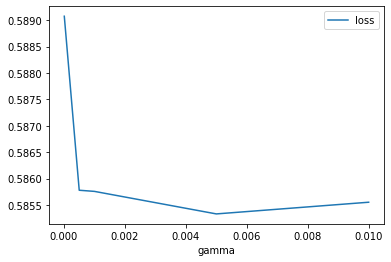

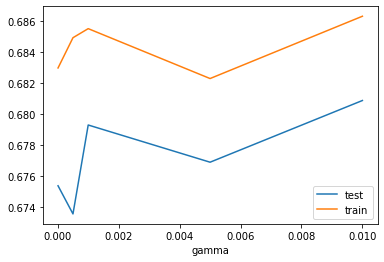

In [54]:
df_gamma = new_df[(new_df['lambda']==0.01) & (new_df['d']==3)].sort_values('gamma')
plt.plot(df_gamma['gamma'], df_gamma['loss'], label='loss')
plt.xlabel('gamma')
plt.legend()
plt.show()
plt.plot(df_gamma['gamma'], df_gamma['acc_test'], label='test')
plt.plot(df_gamma['gamma'], df_gamma['acc_train'], label='train')
plt.xlabel('gamma')
plt.legend()
plt.show()

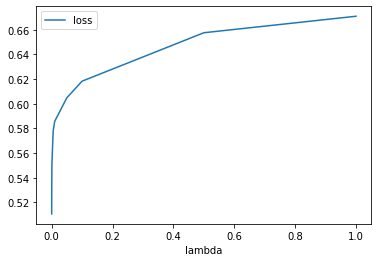

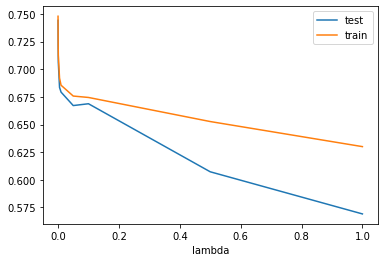

In [55]:
df_lambda = new_df[(new_df['gamma']==0.001) & (new_df['d']==3)].sort_values('lambda')
plt.plot(df_lambda['lambda'], df_lambda['loss'], label='loss')
plt.xlabel('lambda')
plt.legend()
plt.show()
plt.plot(df_lambda['lambda'], df_lambda['acc_test'], label='test')
plt.plot(df_lambda['lambda'], df_lambda['acc_train'], label='train')
plt.xlabel('lambda')
plt.legend()
plt.show()

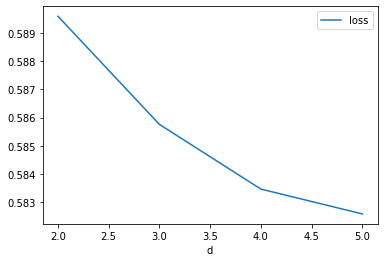

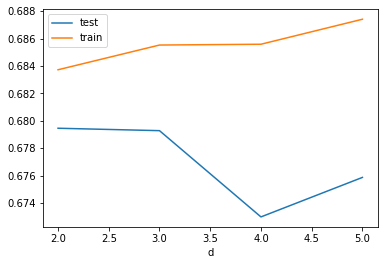

In [56]:
df_d = new_df[(new_df['gamma']==0.001) & (new_df['lambda']==0.01)].sort_values('d')
plt.plot(df_d['d'], df_d['loss'], label='loss')
plt.xlabel('d')
plt.legend()
plt.show()
plt.plot(df_d['d'], df_d['acc_test'], label='test')
plt.plot(df_d['d'], df_d['acc_train'], label='train')
plt.xlabel('d')
plt.legend()
plt.show()

Best $w$ obtained when $d = 3$, $\lambda=0.0001$ and $\gamma = 0.01$. We want to vary $\gamma$. Let us read $w$ first

In [57]:
best_id = 12 
best_frame = frames[best_id]
w_columns = list(filter(lambda x: 'w' in x, frames[best_id].columns)) 
best_w_df = best_frame[best_frame['iteration']==9800000][w_columns]
best_w = best_w_df.values

In [58]:
best_w_dft = best_w_df.transpose()
best_w_dft.columns
abs_best_df = abs(best_w_dft.iloc[:,0])
abs_best_df.sort_values(ascending=False).head(10)

w_7     6.850371
w_3     5.945146
w_1     5.637793
w_45    5.538263
w_13    4.488409
w_30    4.044629
w_10    3.760946
w_44    3.136837
w_38    2.658071
w_34    2.540483
Name: 98, dtype: float64

In [59]:
gamma = 0.00001
max_iter = 10000000
lambda_range = [0.0001, 0.00005, 0.00001, 0]
d = 3
best_w = best_w.flatten()

In [60]:
for lambda_ in lambda_range:
    columns = train_data.columns[2:]
    curr_data = feature_polynomial_expansion(train_data, columns, d)
    curr_data = add_constant_attribute(curr_data)

    x_train, y_train, x_test, y_test = split_train_test(curr_data)
    initial_w = best_w
    
    w, loss, df = reg_logistic_regression(y_train, x_train, lambda_, initial_w, max_iter, 
                                            gamma, frequency=max_iter/100, x_test=x_test, y_test=y_test, 
                                          log=f'd={d};gamma={gamma};lambda={lambda_}.csv')
    plt.plot(loss)
    plt.ylim(0,1)
    plt.title(f'd={d};gamma={gamma};lambda={lambda_}.png')
    plt.savefig(f'd={d};gamma={gamma};lambda={lambda_}.png')
    plt.show()

NameError: name 'train_data' is not defined

# Trying more complex models

In [ ]:
lambda_ = 0.0001
gamma = 0.0001
d_range = range(3,4)
max_iter = 10000000

for d in d_range:
    columns = train_data.columns[2:]
    curr_data = feature_polynomial_expansion(train_data, columns, d)
    curr_data = add_constant_attribute(curr_data)

    x_train, y_train, x_test, y_test = split_train_test(curr_data)
    initial_w = x_train.mean(axis=0)
    
    initial_w[:len(best_w)-1] = best_w[:-1]
    initial_w[-1] = best_w[-1]
    
    w, loss, df = reg_logistic_regression(y_train, x_train, lambda_, initial_w, max_iter, 
                                            gamma, frequency=max_iter/100, x_test=x_test, y_test=y_test, 
                                          log=f'd={d};gamma={gamma};lambda={lambda_}.csv')
    plt.plot(loss)
    plt.ylim(0,1)
    plt.title(f'd={d};gamma={gamma};lambda={lambda_}.png')
    plt.savefig(f'd={d};gamma={gamma};lambda={lambda_}.png')
    plt.show()

# Reading previous data

In [61]:
mypath = './output2/'
filenames = next(walk(mypath), (None, None, []))[2]

i = len(frames)
frames2 = frames.copy()
for file in filenames:
    print(file)
    print(i)
    if '.csv' in file:
        curr_d = int(file[2])
        frames2[i] = pd.read_csv(mypath+file)
        frames2[i]['d'] = curr_d
        frames2[i]['Id'] = i
        i += 1
        
print(len(frames), len(frames2))
n = len(frames2)

d=4;gamma=0.0001;lambda=0.0001.csv
16
d=3;gamma=1e-05;lambda=0.0001.png
17
d=3;gamma=1e-05;lambda=0.csv
17
d=3;gamma=1e-05;lambda=0.0001.csv
18
d=7;gamma=0.0001;lambda=0.0001.csv
19
d=3;gamma=1e-05;lambda=5e-05.csv
20
d=3;gamma=1e-05;lambda=1e-05.csv
21
d=6;gamma=0.0001;lambda=0.0001.png
22
d=8;gamma=0.0001;lambda=0.0001.csv
22
d=3;gamma=0.0001;lambda=0.0001.csv
23
d=5;gamma=0.0001;lambda=0.0001.png
24
d=4;gamma=0.0001;lambda=0.0001.png
24
d=5;gamma=0.0001;lambda=0.0001.csv
24
d=9;gamma=0.0001;lambda=0.0001.csv
25
d=6;gamma=0.0001;lambda=0.0001.csv
26
d=3;gamma=1e-05;lambda=1e-05.png
27
d=3;gamma=1e-05;lambda=0.png
27
d=3;gamma=0.0001;lambda=0.0001.png
27
d=3;gamma=1e-05;lambda=5e-05.png
27
d=7;gamma=0.0001;lambda=0.0001.png
27
d=9;gamma=0.0001;lambda=0.0001.png
27
d=8;gamma=0.0001;lambda=0.0001.png
27
16 27


In [62]:
print(n)

27


In [63]:
for i in range(len(frames), len(frames2)):
    print(i)
    new_df = pd.concat([new_df,frames2[i]
                        [['Id','loss', 'gamma', 'lambda', 'acc_train', 'acc_test'
                          , 'iteration', 'd', ]].sort_values(['loss']).head(1)])
    
new_df

16
17
18
19
20
21
22
23
24
25
26


,Id,loss,gamma,lambda,acc_train,acc_test,iteration,d
5,0,0.618316,0.00100,0.10000,0.674471,0.668781,500000,3
99,1,0.589074,0.00001,0.01000,0.682986,0.675358,9900000,3
49,2,0.585554,0.01000,0.01000,0.686333,0.680879,4900000,3
84,3,0.538104,0.00100,0.00050,0.724054,0.720930,8400000,3
15,4,0.604871,0.00100,0.05000,0.675743,0.667136,1500000,3
40,5,0.585332,0.00500,0.01000,0.682300,0.676885,4000000,3
30,6,0.585780,0.00050,0.01000,0.684943,0.673538,3000000,3
30,7,0.582588,0.00100,0.01000,0.687409,0.675887,3000000,5
48,8,0.551948,0.00100,0.00100,0.712720,0.706307,4800000,3
53,9,0.577674,0.00100,0.00500,0.692029,0.683580,5300000,3


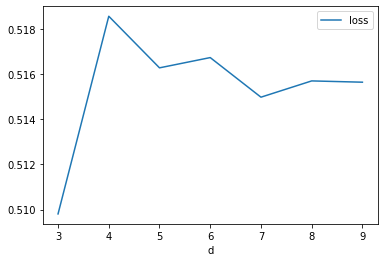

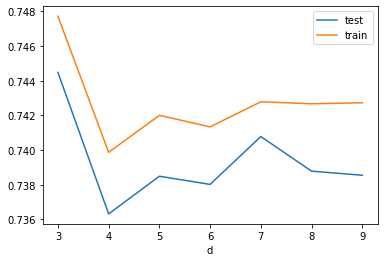

In [64]:
d_df2 = new_df[(new_df['lambda']==0.0001) & (new_df['gamma']==0.0001)]
d_df2 = d_df2.sort_values('d')
plt.plot(d_df2['d'], d_df2['loss'], label='loss')
plt.xlabel('d')
plt.legend()
plt.show()
plt.plot(d_df2['d'], d_df2['acc_test'], label='test')
plt.plot(d_df2['d'], d_df2['acc_train'], label='train')
plt.xlabel('d')
plt.legend()
plt.show()

# Comments on previous plots

Previous plots show us that loss for $d=3$ is less than loss for $d > 3$. This means that we trained model for $d=3$ more than other ones. Thus, we will run these again, with propriate initial parameters.

In [65]:
d = 15
max_iter = 10000000
gamma = 0.0005

columns = train_data.columns[2:]
curr_data = feature_polynomial_expansion(train_data, columns, d)
curr_data = add_constant_attribute(curr_data)

x_train, y_train, x_test, y_test = split_train_test(curr_data)
initial_w = x_train.mean(axis=0)
    
initial_w[:len(best_w)-1] = best_w[:-1]
initial_w[-1] = best_w[-1]

    
w, loss, df = reg_logistic_regression(y_train, x_train, lambda_, w, max_iter, 
                                            gamma, frequency=max_iter/100, x_test=x_test, y_test=y_test, 
                                          log=f'd={d};gamma={gamma};lambda={lambda_}.csv')
plt.plot(loss)
plt.title(f'd={d};gamma={gamma};lambda={lambda_}.png')
plt.savefig(f'd={d};gamma={gamma};lambda={lambda_}.png')
plt.show()

NameError: name 'train_data' is not defined

In [ ]:
print(gamma)

# Statistiacal tests

## Mutual information

In [66]:
from sklearn.feature_selection import mutual_info_classif



columns = train_data.columns[2:]
curr_data = feature_polynomial_expansion(train_data, columns, 3)
    
mutual_info = mutual_info_classif(curr_data.drop(['Id', 'Prediction'], axis=1), curr_data['Prediction'])    

NameError: name 'train_data' is not defined

In [67]:
mutual_info.shape

NameError: name 'mutual_info' is not defined

In [68]:
best_w.shape

(91,)

In [69]:
mutual_df = pd.DataFrame(np.array([mutual_info, best_w[:-1]]).T, columns =['mutual_info', 'weights'])

NameError: name 'mutual_info' is not defined

In [70]:
from sklearn.feature_selection import f_classif

columns = train_daa.columns[2:]
curr_data = feature_polynomial_expansion(train_data, columns, 3)
    
anova_info = f_classif(curr_data.drop(['Id', 'Prediction'], axis=1), curr_data['Prediction'])    

NameError: name 'train_daa' is not defined

In [ ]:
mutual_df['f_stat'] = anova_info[0]
mutual_df['p_value_ANOVA'] = anova_info[1]

In [71]:
mutual_df

NameError: name 'mutual_df' is not defined

In [72]:
anova_df = anova_df.sort_values('p-value', ascending=False).head(20)

NameError: name 'anova_df' is not defined

In [ ]:
n = anova_df.shape[0]

plt.plot(range(n), anova_df['p-value'], label='p_value')
plt.plot(range(n), abs(anova_df['weights']), label='abs weights')
plt.show()

## Kendall

In [73]:
import scipy.stats as stats

columns = train_data.columns[2:]
curr_data = feature_polynomial_expansion(train_data, columns, 3)
y = curr_data['Prediction'].values 
x = curr_data.drop(['Id', 'Prediction'], axis=1).values    
_, D = x.shape

i = 0

kendall = np.array([stats.kendalltau(x[:,i], y) for i in range(D)])
kendall.shape

NameError: name 'train_data' is not defined

In [74]:
mutual_df['kendall-correlation'] = kendall[:,0]
mutual_df['kendall-p_value'] = kendall[:,1]

NameError: name 'kendall' is not defined

# New testings

$k, \gamma, \lambda, d$
GD / SGD

# For Johann

In [75]:
### try LR with SGD

k_range = [1,10, 20, 50, 100, 500, 1000]
lambda_range = [0,0.00001, 0.00005, 0.0001, 0.005]
gamma_range = [0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005]
d_range = [2,3,4,5]


for k in k_range():
    data = fill_nan(train_data, k, how="mean")
    for d in d_range:
        for lambda_ in lambda_range:
            for gamma in gamma_range:
                columns = data.columns[2:]
                curr_data = feature_polynomial_expansion(data, columns, d)
                curr_data = add_constant_attribute(curr_data)

                x_train, y_train, x_test, y_test = split_train_test(curr_data)
                initial_w = x_train.mean(axis=0)
    
                w, loss, df = reg_logistic_regression(y_train, x_train, def_lambda_, initial_w, max_iters, 
                                            def_gamma, 0, x_test=x_test, y_test=y_test, 
                                          log=f'd={d};gamma={def_gamma};lambda={def_lambda_}.csv')
       
    
        
    


TypeError: 'list' object is not callable

In [76]:
df.head()
df.to_csv("testKKN.csv")


NameError: name 'df' is not defined

# Genetic algorithm

In [77]:
train_data, test_data = load_data()
print(train_data.columns)
print(train_data.shape, test_data.shape)
train_data['Prediction'] = train_data['Prediction'].apply(lambda x: int(x=='b'))
train_data.drop(['Id'], axis=1, inplace=True)
test_data.drop(['Id'], axis=1, inplace=True)
print(train_data.shape, test_data.shape)
train_data, test_data = transform_categorical_data(train_data, test_data)

print(train_data.shape, test_data.shape)
train_data = fill_nans_with_median(train_data)
print(train_data.shape, test_data.shape)

not_categorical = lambda x: (x!='Prediction') and (x[:-1] != 'PRI_jet_num') and (x!='Constant')
non_categorical_columns = list(filter(not_categorical, train_data.columns))

### Izdvojiti sve kolone gde je min veci od nule
positive_columns = []
for column in non_categorical_columns:
    if train_data[column].min() > 0 and test_data[column].min()>0:
        positive_columns.append(column)

train_data = feature_log_expansion(train_data, positive_columns)
test_data = feature_log_expansion(test_data, positive_columns)


train_data = standardize(train_data)
test_data = standardize(test_data)
train_data = feature_exp_expansion(train_data, non_categorical_columns)
test_data = feature_exp_expansion(test_data, non_categorical_columns)

train_data = standardize(train_data)
test_data = standardize(test_data)

train_data = add_constant_attribute(train_data)
test_data = add_constant_attribute(test_data)

param_columns = train_data.columns[1:]
train_data.shape, test_data.shape

Index(['Id', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')
(250000, 32) (568238, 32)
(250000, 31) (568238, 31)
(250000, 34) (568238, 34)
(250000, 34) (568238, 34)


((250000, 72), (568238, 72))

In [78]:
train_data.head()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,exp_PRI_met_phi,exp_PRI_met_sumet,exp_PRI_jet_leading_pt,exp_PRI_jet_leading_eta,exp_PRI_jet_leading_phi,exp_PRI_jet_subleading_pt,exp_PRI_jet_subleading_eta,exp_PRI_jet_subleading_phi,exp_PRI_jet_all_pt,Constant
0,0,0.109407,0.074854,0.068128,0.009869,0.107021,0.022395,0.596501,0.521549,0.014789,...,0.336164,0.076254,0.020324,0.636519,0.447882,0.013677,0.519281,0.065170,0.041876,1
1,1,0.128398,0.099653,0.072155,0.016983,0.247795,0.042787,0.512775,0.596238,0.000733,...,0.125376,0.045830,0.008724,0.458052,0.571824,0.015264,0.376475,0.377235,0.016705,1
2,1,0.087374,0.235006,0.089071,0.012570,0.247795,0.042787,0.512775,0.536888,0.003293,...,0.095627,0.076810,0.007655,0.623454,0.112900,0.015264,0.376475,0.377235,0.015982,1
3,1,0.114001,0.117983,0.055557,0.000146,0.247795,0.042787,0.512775,0.566472,0.000146,...,0.386746,0.021555,0.019290,0.377541,0.372590,0.015264,0.376475,0.377235,0.000000,1
4,1,0.141017,0.024512,0.095662,0.005787,0.247795,0.042787,0.512775,0.672571,0.005787,...,0.253351,0.011651,0.019290,0.377541,0.372590,0.015264,0.376475,0.377235,0.000000,1


In [79]:
def run(train_data, parameters, GD=False):
    curr_data= train_data.copy()
    for key, value in parameters.items():
        if key in ['lambda', 'gamma']:
            continue
        curr_data = feature_polynomial_expansion(curr_data, [key], value)

    seed = random.randint(1,100)
    x_train, y_train, x_test, y_test = split_train_test(curr_data, seed=seed)
    
    lambda_ = parameters['lambda']
    gamma = parameters['gamma']
    initial_w = x_train.mean(axis=0)
    
    if GD:
        max_iters = 200
        w, loss = reg_logistic_regression_GD(y_train, x_train, lambda_ ,initial_w, max_iters, gamma)
    else:
        max_iters = 1000000
        w, loss = reg_logistic_regression(y_train, x_train, lambda_ ,initial_w, max_iters, gamma)
                                  
    evaluation_test = evaluate_on_set(w, x_test, y_test)
    evaluation_train = evaluate_on_set(w, x_train, y_train)
    
    return w, evaluation_test, evaluation_train

In [80]:
parameters = {}
for column in train_data.columns:
    if column == 'Prediction' or column=='Constant':
        continue
    parameters[column] = 1
parameters['lambda'] = 0
parameters['gamma'] = 0.00001
w, evaluation_test, evaluation_train = run(train_data, parameters, GD=True)

In [81]:
print(evaluation_test)

{'accuracy': 0.503112, 'recall': 0.40627301562361906, 'precision': 0.9616475291711217, 'f1_score': 0.5712194953574264}


In [82]:
submission = pd.read_csv('./data/sample-submission.csv')

In [83]:
submission.head()

,Id,Prediction
0,350000,-1
1,350001,-1
2,350002,-1
3,350003,-1
4,350004,-1


In [84]:
for key, value in parameters.items():
    if key in ['lambda', 'gamma']:
        continue
    
    test_data = feature_polynomial_expansion(test_data, [key], value)


In [85]:
test_data.head()


,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,exp_PRI_met_phi,exp_PRI_met_sumet,exp_PRI_jet_leading_pt,exp_PRI_jet_leading_eta,exp_PRI_jet_leading_phi,exp_PRI_jet_subleading_pt,exp_PRI_jet_subleading_eta,exp_PRI_jet_subleading_phi,exp_PRI_jet_all_pt,Constant
0,?,0.000000,0.082163,0.013596,0.002270,0.00000,0.000000,0.000000,0.120783,0.003998,...,0.741742,0.023098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,?,0.374932,0.069673,0.064490,0.037387,0.00000,0.000000,0.000000,0.328437,0.003528,...,0.218603,0.045088,0.362291,0.992054,0.993712,0.000000,0.000000,0.000000,0.015076,1
2,?,0.378798,0.058045,0.071174,0.003094,0.00000,0.000000,0.000000,0.456656,0.005448,...,0.130800,0.026708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,?,0.384926,0.031594,0.071913,0.006808,0.00000,0.000000,0.000000,0.466812,0.011989,...,0.574272,0.041771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,?,0.363997,0.085449,0.041268,0.067041,0.99268,0.265052,0.982306,0.143453,0.101681,...,0.342909,0.280345,0.456913,0.991333,0.994522,0.535241,0.993448,0.999124,0.221186,1


In [86]:
test_data.shape

(568238, 72)

In [87]:
w.shape

(71,)

In [88]:
y_predict = predict(test_data, w)

ValueError: shapes (568238,72) and (71,) not aligned: 72 (dim 1) != 71 (dim 0)

In [ ]:
y_predict

In [ ]:
y_predict.mean()

In [ ]:
submission['Prediction'] = y_predict

In [ ]:
def to_boson(x):
    if x == 0:
        return -1
    return 1

submission['Prediction'] = submission['Prediction'].apply(to_boson)

In [ ]:
submission.head()
submission.to_csv('submission2.csv')

# Genetic algorithm

In [89]:
def make_population(population_size):
    population = []
    for i in range(population_size):
        lambda_ = random.choice([0, 0.00001, 0.00005, 0.0001,0.0005,0.001])
        gamma= random.choice([0.00001, 0.00005, 0.0001])
        param = {'lambda' : lambda_, 'gamma' : gamma}
        for key in param_columns:
            if 'PRI_jet_num' in key:
                param[key] = np.random.randint(1,2)
            else:
                param[key] = np.random.randint(1,4)
        population.append(param)
    return population

def make_babies(parent1, parent2):
    n = len(parent1)
    baby1 = {}
    baby2 = {}
    crossing_point = np.random.randint(1,n-1)
    for i,key in enumerate(parent1.keys()):
        mutation_indicator = np.random.uniform(0,1)
        if mutation_indicator > 0.05:
            if i > crossing_point:
                baby1[key] = parent1[key]
                baby2[key] = parent2[key]
            else:
                baby2[key] = parent1[key]
                baby1[key] = parent2[key]
        else:
            if key =='lambda':
                baby2[key] = random.choice([0, 0.00001, 0.00005, 0.0001,0.0005,0.001])
                baby1[key] =  random.choice([0, 0.00001, 0.00005, 0.0001,0.0005,0.001])
            elif key == 'gamma':
                baby2[key] = random.choice([0.00001, 0.00005, 0.0001])
                baby1[key] = random.choice([0.00001, 0.00005, 0.0001])
            elif 'PRI_num_jet' in key:
                baby2[key] = random.choice([1])
                baby1[key] = random.choice([1])
            else:
                baby2[key] = random.choice([1, 2, 3])
                baby1[key] = random.choice([1, 2, 3])
    return baby1, baby2


In [90]:
def take_best_from_population(population, fitness, size):
    sorted_population = sorted(population, key=lambda x: -fitness[str(x)])
    return sorted_population[:size]

In [91]:
def get_min(d1, d2):
    return min(d1['accuracy'], d2['accuracy'])


In [92]:
def optimize(train_data, log, GD, population_size=20, size=10, max_iters=40):
    f = open(log, 'a')
    population = make_population(population_size)
    
    fitness = {}
    w = {}
    for i in range(max_iters):
        print(i)
        for param in population:
            if str(param) in fitness:
                continue
            w[str(param)], test_evaluation, train_evaluation = run(train_data, param, GD)
            fitness[str(param)] = get_min(test_evaluation, train_evaluation)
            f.write(str(w[str(param)]))
            f.write('\n')
            f.write(str(param))
            f.write('\n')
            f.write(str(fitness[str(param)]))
            f.write('\n-----------------------------------------------\n')
            
        best = take_best_from_population(population, fitness, size)
        random.shuffle(best)
        
        for i in range(len(best)//2):
            baby1, baby2 = make_babies(best[2*i], best[2*i+1])
            best.append(baby1)
            best.append(baby2)
            
        population = best
    
    f.close()
        
    return fitness, w

In [ ]:
fitness1, w1 = optimize(train_data, "fileGD.txt", True)
fintess2, w2 = optimize(train_data, "fileSGD.txt", False)


0


In [94]:
max([k for _,k in fitness.items()])

NameError: name 'fitness' is not defined

In [63]:
max_key = max(fitness, key=fitness.get)
max_key

"{'lambda': 5e-05, 'gamma': 1e-05, 'DER_mass_MMC': 2, 'DER_mass_transverse_met_lep': 3, 'DER_mass_vis': 2, 'DER_pt_h': 3, 'DER_deltaeta_jet_jet': 3, 'DER_mass_jet_jet': 2, 'DER_prodeta_jet_jet': 3, 'DER_deltar_tau_lep': 1, 'DER_pt_tot': 3, 'DER_sum_pt': 1, 'DER_pt_ratio_lep_tau': 1, 'DER_met_phi_centrality': 1, 'DER_lep_eta_centrality': 3, 'PRI_tau_pt': 2, 'PRI_tau_eta': 1, 'PRI_tau_phi': 1, 'PRI_lep_pt': 1, 'PRI_lep_eta': 2, 'PRI_lep_phi': 1, 'PRI_met': 3, 'PRI_met_phi': 3, 'PRI_met_sumet': 1, 'PRI_jet_leading_pt': 3, 'PRI_jet_leading_eta': 1, 'PRI_jet_leading_phi': 3, 'PRI_jet_subleading_pt': 3, 'PRI_jet_subleading_eta': 3, 'PRI_jet_subleading_phi': 1, 'PRI_jet_all_pt': 3, 'PRI_jet_num0': 1, 'PRI_jet_num1': 1, 'PRI_jet_num2': 1, 'PRI_jet_num3': 1, 'log_DER_mass_vis': 1, 'log_DER_deltar_tau_lep': 2, 'log_DER_sum_pt': 3, 'log_DER_pt_ratio_lep_tau': 2, 'log_PRI_tau_pt': 3, 'log_PRI_lep_pt': 2, 'log_PRI_met': 3, 'log_PRI_met_sumet': 1, 'exp_DER_mass_MMC': 3, 'exp_DER_mass_transverse_met_

In [64]:
float("5e-05")

5e-05

In [65]:
def get_parameters_from_str(s):
    arr = max_key.split(',')
    param = {}
    for i in range(0, len(arr)):
        j1 = arr[i].find('\'')+1
        j2 = arr[i][j1:].find('\'')
        key = arr[i][j1:][:j2]
        i1 = arr[i].find(':')+1
        if arr[i].find('}') > 0:
            arr[i] = arr[i][:-1]
        if i < 2:
            num = float(arr[i][i1:])
        else:
            num = int(arr[i][i1:])
        param[key] = num
    return param

In [67]:
parameters = get_parameters_from_str(max_key)
parameters

{'lambda': 5e-05,
 'gamma': 1e-05,
 'DER_mass_MMC': 2,
 'DER_mass_transverse_met_lep': 3,
 'DER_mass_vis': 2,
 'DER_pt_h': 3,
 'DER_deltaeta_jet_jet': 3,
 'DER_mass_jet_jet': 2,
 'DER_prodeta_jet_jet': 3,
 'DER_deltar_tau_lep': 1,
 'DER_pt_tot': 3,
 'DER_sum_pt': 1,
 'DER_pt_ratio_lep_tau': 1,
 'DER_met_phi_centrality': 1,
 'DER_lep_eta_centrality': 3,
 'PRI_tau_pt': 2,
 'PRI_tau_eta': 1,
 'PRI_tau_phi': 1,
 'PRI_lep_pt': 1,
 'PRI_lep_eta': 2,
 'PRI_lep_phi': 1,
 'PRI_met': 3,
 'PRI_met_phi': 3,
 'PRI_met_sumet': 1,
 'PRI_jet_leading_pt': 3,
 'PRI_jet_leading_eta': 1,
 'PRI_jet_leading_phi': 3,
 'PRI_jet_subleading_pt': 3,
 'PRI_jet_subleading_eta': 3,
 'PRI_jet_subleading_phi': 1,
 'PRI_jet_all_pt': 3,
 'PRI_jet_num0': 1,
 'PRI_jet_num1': 1,
 'PRI_jet_num2': 1,
 'PRI_jet_num3': 1,
 'log_DER_mass_vis': 1,
 'log_DER_deltar_tau_lep': 2,
 'log_DER_sum_pt': 3,
 'log_DER_pt_ratio_lep_tau': 2,
 'log_PRI_tau_pt': 3,
 'log_PRI_lep_pt': 2,
 'log_PRI_met': 3,
 'log_PRI_met_sumet': 1,
 'exp_DER_m

In [68]:
curr_data= train_data.copy()
for key, value in parameters.items():
    if key in ['lambda', 'gamma']:
        continue
    curr_data = feature_polynomial_expansion(curr_data, [key], value)
    test_data = feature_polynomial_expansion(test_data, [key], value)

x_train = curr_data.drop('Prediction', axis=1)
y_train = curr_data['Prediction']
lambda_ = parameters['lambda']
gamma = parameters['gamma']
    #initial_w = x_train.mean(axis=0)
initial_w = x_train.means(axis=0)
GD= True
if GD:
    max_iters = 100
    w, loss = reg_logistic_regression_GD(y_train, x_train, lambda_ ,initial_w, max_iters, gamma)
else:
    max_iters = 1000000
    w, loss = reg_logistic_regression(y_train, x_train, lambda_ ,initial_w, max_iters, gamma)
                                  

evaluation_train = evaluate_on_set(w, x_train, y_train)

In [69]:
evaluation_train

{'accuracy': 0.6933279999999999,
 'recall': 0.9831926636768026,
 'precision': 0.686143445007368,
 'f1_score': 0.808238913483905}

In [70]:
test_data.head()

for key, value in parameters.items():
    if key == 'lambda' or key == 'gamma':
        continue
    test_data =feature_polynomial_expansion(test_data, [key], value)
    
y_predict = predict(test_data.drop('Prediction', axis=1), w)

In [71]:
y_predict.mean()

0.9999225676565101

In [6]:
import numpy as np
a = np.array([[1,2],[3,4]])
c = a[:,0]
m = np.median(c[c!=3])
c[c==3] = m

In [19]:
def add_column(data, column):
    tmp = np.asmatrix(column).T
    return np.concatenate((data, tmp), axis=1)
    
a = add_column(a, np.array([1,2]))

AxisError: axis 1 is out of bounds for array of dimension 1

In [20]:
a

array(['lala', 'a', 'p'], dtype='<U4')

In [18]:
a=np.array(["lala", "a", "p"])
np.delete(a, "lala")

IndexError: arrays used as indices must be of integer (or boolean) type

In [22]:
a = np.array([[1,2,3],[4,5,6]])
np.sum(a[:,1] * a[:,1])

29

In [23]:
a[:,1].shape

(2,)